# Scoring products of Digikala

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
digikala = pd.read_csv('new_comments.csv')
digikala.head()

,id,title,body,created_at,rate,recommendation_status,is_buyer,product_id,likes,dislikes,seller_title,seller_code,true_to_size_rate,advantages_count,disadvantages_count
0,53672599,1,3,23 شهریور 1402,1.0,1.0,True,252058,0,0,دیجی‌کالا,5A52N,0,0,0
1,9897229,1,10,16 تیر 1399,0.0,1.0,True,252058,1,0,دیجی‌کالا,5A52N,0,1,1
2,38074516,1,19,26 مرداد 1401,0.0,1.0,True,3331597,0,0,آرالیا بیوتی,ADM47,0,0,0
3,18628562,1,18,28 اسفند 1399,0.0,1.0,True,3331329,0,0,اینجاست آ,9ZMCZ,0,0,0
4,53301258,1,19,12 شهریور 1402,3.0,1.0,True,3255700,0,0,گالری آرایشی به سیما,CDWHA,0,0,0


In [11]:
digikala.describe()

,id,title,body,rate,recommendation_status,product_id,likes,dislikes,true_to_size_rate,advantages_count,disadvantages_count
count,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06,2.039796e+06
mean,3.726266e+07,5.273723e-01,9.948859e+00,3.601411e+00,8.071618e-01,3.815474e+06,4.019912e-01,7.586690e-02,1.540399e-02,2.073016e-01,8.015213e-02
std,1.380285e+07,4.992503e-01,1.320414e+01,1.611110e+00,3.625426e-01,2.982049e+06,2.014121e+00,7.649543e-01,1.231532e-01,6.966602e-01,3.539437e-01
min,9.916640e+05,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.230200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.779499e+07,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.485287e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.067003e+07,1.000000e+00,6.000000e+00,4.000000e+00,1.000000e+00,3.098662e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.905866e+07,1.000000e+00,1.200000e+01,5.000000e+00,1.000000e+00,5.752582e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.474516e+07,1.000000e+00,8.240000e+02,5.000000e+00,1.000000e+00,1.268018e+07,8.960000e+02,2.800000e+02,1.000000e+00,3.200000e+01,1.200000e+01


fix column created_at date time

In [36]:
from persiantools.jdatetime import JalaliDate

def persian_month_to_number(month_name):
    persian_months = {'فروردین':'01',
                      'اردیبهشت':'02',
                      'خرداد':'03',
                      'تیر':'04',
                      'مرداد':'05',
                      'شهریور':'06',
                      'مهر':'07',
                      'آبان':'08',
                      'آذر':'09',
                      'دی':'10',
                      'بهمن':'11',
                      'اسفند':'12'}
    return persian_months[month_name]

In [37]:
digikala['created_at'] = digikala['created_at'].apply(lambda x: JalaliDate(int(x.split()[2]), int(persian_month_to_number(x.split()[1])), int(x.split()[0])))

# Exploring Data

## Comments Length Analyis
I want to declare Intervals for scoring on comments lenrgth. here is three method :
1. Heuristic-Based
2. Percentile-Based
3. Clustering-Based

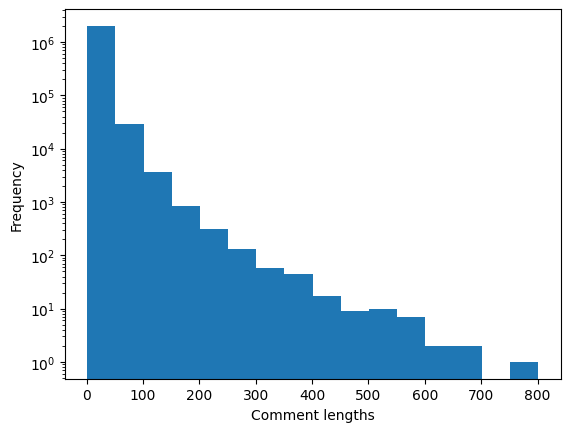

In [26]:
comments = digikala['body']
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
plt.xlabel('Comment lengths')
plt.ylabel('Frequency')
plt.show()

In [22]:
import bisect
from collections import defaultdict

def score_comment(intervals, length):
    return bisect.bisect_left(intervals, length)

def total_score_comment(intervals, lengths):
    local_sum = 0
    lengths_dict = defaultdict(list)
    for length in lengths:
        score = score_comment(intervals, length)
        local_sum += score
        lengths_dict[score].append(length)

    lengths_stats = {}
    for score, lengths in lengths_dict.items():
        lengths_stats[score] = {
            'num' : len(lengths),
            'mean': np.mean(lengths),
            'std': np.std(lengths),
            'sum' : np.sum(lengths)
        }
    return lengths_stats, local_sum

In [40]:
# check function
intervals = [0, 1, 5, 10]
lengths = [0,0,1,2,2,3,6,4,6,20,23,43]

lengths_stats, local_sum = total_score_comment(intervals, lengths)
print(lengths_stats)
print(local_sum)

{0: {'num': 2, 'mean': 0.0, 'std': 0.0, 'sum': 0}, 1: {'num': 1, 'mean': 1.0, 'std': 0.0, 'sum': 1}, 2: {'num': 4, 'mean': 2.75, 'std': 0.82915619758885, 'sum': 11}, 3: {'num': 2, 'mean': 6.0, 'std': 0.0, 'sum': 12}, 4: {'num': 3, 'mean': 28.666666666666668, 'std': 10.208928554075703, 'sum': 86}}
27


### Heuristic-Based

In [27]:
heuristic_intervals = [1, 5, 20, 100, 300, 500, 1000]

lengths_stats, local_sum = total_score_comment(heuristic_intervals, comments)
print(lengths_stats)

{1: {'num': 796303, 'mean': 3.4660324022388465, 'std': 1.08103040572567, 'sum': 2760012}, 2: {'num': 863707, 'mean': 10.492713385442054, 'std': 3.955346066809421, 'sum': 9062630}, 0: {'num': 155882, 'mean': 1.0, 'std': 0.0, 'sum': 155882}, 3: {'num': 218809, 'mean': 34.59602667166342, 'std': 14.792060432161255, 'sum': 7569922}, 4: {'num': 4941, 'mean': 138.35013155231735, 'std': 39.514956018228645, 'sum': 683588}, 5: {'num': 130, 'mean': 364.5153846153846, 'std': 47.40743768575764, 'sum': 47387}, 6: {'num': 24, 'mean': 592.5416666666666, 'std': 98.16439407386412, 'sum': 14221}}


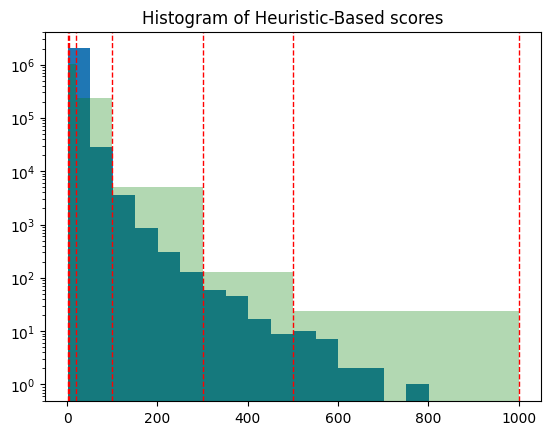

In [28]:
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
for boundary in heuristic_intervals:
    plt.axvline(boundary, color='r', linestyle='dashed', linewidth=1)
plt.hist(comments, bins= heuristic_intervals, log = True, color= 'green', alpha = 0.3)
plt.title('Histogram of Heuristic-Based scores')
plt.show()

### Percentile-Based

In [29]:
percentiles = [10, 25, 50, 75, 90]
percentile_intervals = np.percentile(comments, percentiles)
percentile_intervals = np.append(percentile_intervals, 1000)
print(percentile_intervals)

lengths_stats, local_sum = total_score_comment(percentile_intervals, comments)
print(lengths_stats)

[   2.    3.    6.   12.   22. 1000.]
{1: {'num': 216897, 'mean': 3.0, 'std': 0.0, 'sum': 650691}, 3: {'num': 477556, 'mean': 9.045538114901708, 'std': 1.675103527748681, 'sum': 4319751}, 4: {'num': 279002, 'mean': 16.534021261496335, 'std': 2.7847743100447415, 'sum': 4613025}, 0: {'num': 347387, 'mean': 1.5512727879857335, 'std': 0.49736415352553304, 'sum': 538892}, 2: {'num': 528206, 'mean': 4.8620064898922015, 'std': 0.8063512672535182, 'sum': 2568141}, 5: {'num': 190748, 'mean': 39.85961582821314, 'std': 25.073895527486588, 'sum': 7603142}}


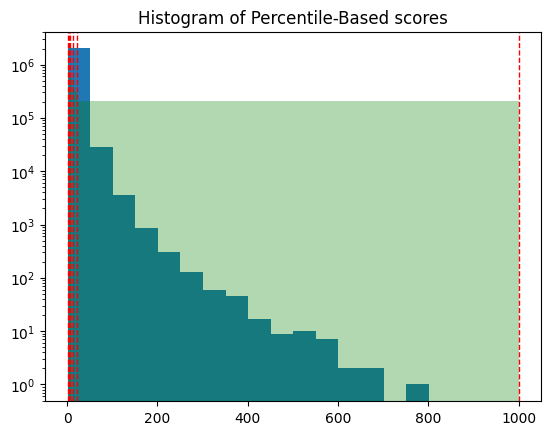

In [30]:
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
for boundary in percentile_intervals:
    plt.axvline(boundary, color='r', linestyle='dashed', linewidth=1)
plt.hist(comments, bins= percentile_intervals, log = True, color= 'green', alpha = 0.3)
plt.title('Histogram of Percentile-Based scores')
plt.show()

### Clustering-Based

In [31]:
n_intervals = 6
comment_lengths_reshaped = np.reshape(comments, (-1, 1))

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_intervals, random_state=42).fit(comment_lengths_reshaped)
clustering_intervals = np.sort(kmeans.cluster_centers_.flatten())
clustering_intervals = np.append(clustering_intervals, 1000)
print(clustering_intervals)

lengths_stats, local_sum = total_score_comment(clustering_intervals, comments)
print(lengths_stats)

[   4.38289693   14.0273598    28.53526717   52.72839532  102.9202613
  244.65111347 1000.        ]
{0: {'num': 777478, 'mean': 2.6269026261836346, 'std': 1.0878024765158996, 'sum': 2042359}, 1: {'num': 878391, 'mean': 8.186317938139165, 'std': 2.7308040747464593, 'sum': 7190788}, 2: {'num': 261188, 'mean': 19.807047031257177, 'std': 3.8533735200481143, 'sum': 5173363}, 3: {'num': 92148, 'mean': 37.10802187784868, 'std': 6.480387993955106, 'sum': 3419430}, 4: {'num': 25780, 'mean': 67.93456167571762, 'std': 12.715778555197286, 'sum': 1751353}, 5: {'num': 4499, 'mean': 136.1426983774172, 'std': 32.119921395338096, 'sum': 612506}, 6: {'num': 312, 'mean': 332.83012820512823, 'std': 97.90674521685378, 'sum': 103843}}


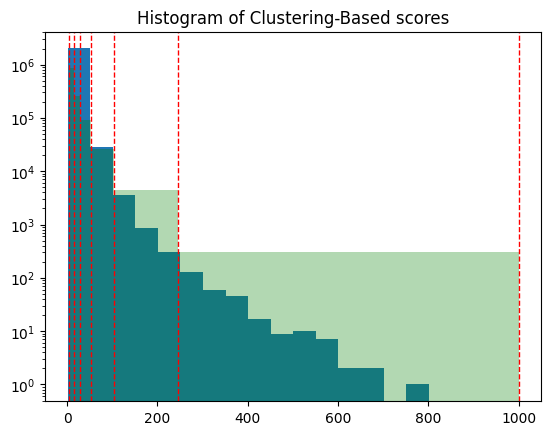

In [32]:
plt.hist(comments, bins= np.arange(min(comments), max(comments), 50), log=True)
for boundary in clustering_intervals:
    plt.axvline(boundary, color='r', linestyle='dashed', linewidth=1)
plt.hist(comments, bins= clustering_intervals, log = True, color= 'green', alpha = 0.3)
plt.title('Histogram of Clustering-Based scores')
plt.show()

### Distribution of Product's Scores

In [33]:
df = digikala[['body', 'product_id']].reset_index(drop=True)
df['score'] = df['body'].apply(lambda comment: score_comment(clustering_intervals, comment))
result = df.groupby('product_id')['score'].sum().reset_index()
result.head()

,product_id,score
0,12302,2
1,18247,13
2,18261,0
3,18264,1
4,18269,1


In [48]:
result['score'].describe()

count    331599.000000
mean         20.164256
std          43.695970
min           0.000000
25%           2.000000
50%           4.000000
75%          14.000000
max         472.000000
Name: score, dtype: float64

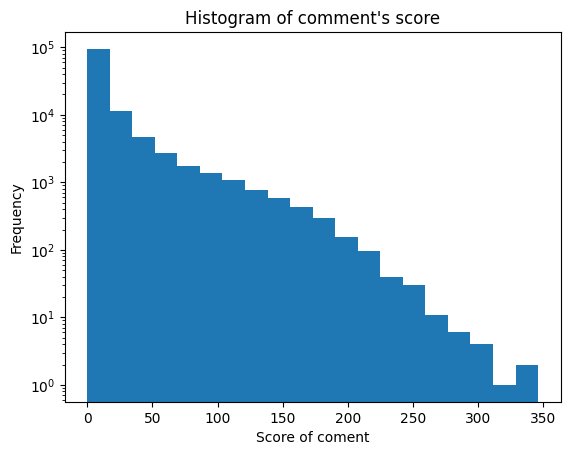

In [34]:
plt.hist(result['score'],bins= 20, log=True)
plt.xlabel('Score of coment')
plt.ylabel('Frequency')
plt.title('Histogram of comment\'s score')
plt.show()

## Rates And Comments Grouping
We want to divide comments into positive and negative groups. In the simplest case, we do this using rates. Otherwise, we refer to the comment sentiment.

### Rates Distribution

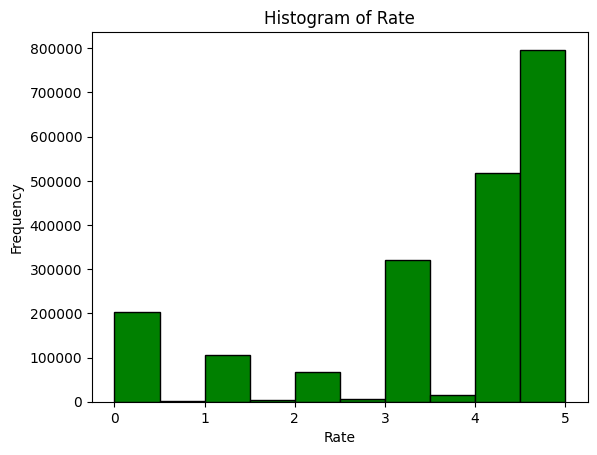

In [35]:
plt.hist(digikala['rate'], color='green', edgecolor='black')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Rate')
plt.show()

### Labeling comments

In [ ]:
sentiments = pd.read_csv("sentiments.csv")
digikala = digikala.merge(sentiments, on='id')
digikala.head()

In [ ]:
def label_group(comment):
    if comment['rate'] > 3:
        return "positive"
    if 0 < comment['rate'] < 3:
        return "negative"
    return comment['sentiment']

digikala['label'] = digikala.apply(label_group, axis=1)

# Define Scoring Function

In [52]:
grouped_digikala = digikala.groupby(['product_id', 'seller_title'])

## Simple Scoring

In [53]:
def simple_score(group):
    group = group[group['is_buyer']]

    _, comments = total_score_comment(clustering_intervals, group['body'])
    comments_score = comments / 1000
    rates_score = (group['rate'] > 0).sum()
    titles_score = group['title'].sum()
    likes_score = group['likes'].sum() + group['dislikes'].sum()
    recommended_score = group['recommendation_status'].sum()
    advantages_score = group['advantages_count'].sum() + group['disadvantages_count'].sum()
    
    total_score = (comments_score + rates_score + titles_score + 
                   likes_score + recommended_score + advantages_score)
    
    return total_score

simple_df = grouped_digikala.apply(simple_score).reset_index(name='simple_score')
simple_df.head()

,product_id,seller_title,simple_score
0,7602,برزان,112.047
1,7602,برهان الکترونیک,3.001
2,7602,به روز سنتر,10.003
3,7602,جانبی انسی,32.012
4,7602,جانبی حبیب,2.000


In [54]:
# Divide by total number
def avg_simple_score(group):
    group = group[group['is_buyer']]

    _, comments = total_score_comment(clustering_intervals, group['body'])
    comments_score = comments / 1000
    rates_score = (group['rate'] > 0).sum()
    titles_score = group['title'].sum()
    likes_score = group['likes'].sum() + group['dislikes'].sum()
    recommended_score = group['recommendation_status'].sum()
    advantages_score = group['advantages_count'].sum() + group['disadvantages_count'].sum()
    
    total_score = (comments_score + rates_score + titles_score + 
                   likes_score + recommended_score + advantages_score) / len(group) * 100
    
    return total_score

avg_simple_df = grouped_digikala.apply(avg_simple_score).reset_index(name='avg_simple_score')
avg_simple_df.head()

,product_id,seller_title,avg_simple_score
0,7602,برزان,350.146875
1,7602,برهان الکترونیک,300.100000
2,7602,به روز سنتر,500.150000
3,7602,جانبی انسی,320.120000
4,7602,جانبی حبیب,200.000000


## Weighted Scoring:

In [ ]:
# By weightes
def weighted_score(group):
    group = group[group['is_buyer']]

    weights = {
        "body" : 10,
        "title" : 3,
        "rate" : 4,
        "likes" : 4,
        "recommendation" : 3,
        "advantages" : 5
    }

    _, comments = total_score_comment(clustering_intervals, group['body'])
    comments_score = weights["body"]*comments / 100
    rates_score =  weights["rate"]*(group['rate'] > 0).sum()
    titles_score =  weights["title"]*group['title'].sum()
    likes_score =  weights["likes"]*(group['likes'].sum() + group['dislikes'].sum())
    recommended_score =  weights["recommendation"]* group['recommendation_status'].sum()
    advantages_score = weights["advantages"]* (group['advantages_count'].sum() + group['disadvantages_count'].sum())
    
    total_score = (comments_score + rates_score + titles_score + 
                   likes_score + recommended_score + advantages_score) / sum(weights.values())
    
    return total_score

weighted_score_df = grouped_digikala.apply(weighted_score).reset_index(name='weighted_score')
weighted_score_df.head()

In [ ]:
# average by weightes 
def avg_weighted_score(group):
    group = group[group['is_buyer']]

    weights = {
        "body" : 10,
        "title" : 3,
        "rate" : 4,
        "likes" : 4,
        "recommendation" : 3,
        "advantages" : 5
    }

    _, comments = total_score_comment(clustering_intervals, group['body'])
    comments_score = weights["body"]*comments / 100
    rates_score =  weights["rate"]*(group['rate'] > 0).sum()
    titles_score =  weights["title"]*group['title'].sum()
    likes_score =  weights["likes"]*(group['likes'].sum() + group['dislikes'].sum())
    recommended_score =  weights["recommendation"]* group['recommendation_status'].sum()
    advantages_score = weights["advantages"]* (group['advantages_count'].sum() + group['disadvantages_count'].sum())
    
    total_score = ((comments_score + rates_score + titles_score + 
                   likes_score + recommended_score + advantages_score) / sum(weights.values())) / len(group) * 100
    
    return total_score

avg_weighted_score_df = grouped_digikala.apply(weighted_score).reset_index(name='avg_weighted_score')
avg_weighted_score_df.head()

### Biased Score

In [ ]:
def biased_score(group):
    total_score = 0
    total_negative_score = 0
    total_positive_score = 0

    for comment in group:
        if not comment['is_buyer']:
            continue
        body_score = score_comment(clustering_intervals, comment['body']) / 1000
        rate_score = 1 if comment['rate'] > 0 else 0
        title_score = comment['title']
        recommended_score = comment['recommendation_status']
        advantage_score = comment['advantages_count'] + comment['disadvantages_count']

        likes = comment['likes'] + 1  # own comment
        dislikes = comment['dislikes']
        f = likes / (likes + dislikes)
        score = body_score + rate_score + title_score + recommended_score + advantage_score

        if comment['label'] == 'positive':
            pos_score = f * score
            neg_score = score - pos_score
        else:
            neg_score = f * score
            pos_score = score - neg_score

        total_score += score
        total_negative_score += neg_score
        total_positive_score += pos_score
    return total_score, total_positive_score, total_negative_score


biased_score_grouped = grouped_digikala.apply(lambda group: pd.Series(biased_score(group), index=['biased_score', 'biased_positive_score', 'biased_negative_score']))
biased_score_df = biased_score_grouped.reset_index()
biased_score_df.head()

In [ ]:
result = (simple_df
          .merge(avg_simple_df, on=['product_id', 'seller_title'], how='inner')
          .merge(weighted_score_df, on=['product_id', 'seller_title'], how='inner')
          .merge(avg_weighted_score_df, on=['product_id', 'seller_title'], how='inner')
          .merge(biased_score_df, on=['product_id', 'seller_title'], how='inner'))
result.head()

In [ ]:
result.to_csv('scored_products.csv')